# Data Cleaning
Import standard modules, along with `report_nulls`, which is a custom script that shows the number of NaN values in each column as well as their proportions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from report_nulls import report_nulls
%matplotlib inline

In [2]:
original_accounting = pd.read_csv('./accounting_original.csv')

In [3]:
original_accounting.head()

,Timestamp,Firm exit status,Do you have your CPA license?,How many years of experience in accounting do you have? (If none please skip),What is your current salary + bonus in USD? (Example Format: 50000) (If none please skip),"If you have exited a public accounting firm, how many years did you work in public accounting before exiting? (Please skip if this doesn't apply to you)",What industry do you work in?,What COL is your region?,Where do you live?,Gender,What is your line of service? (Or was in the case of those who have exited),How many hours do you currently work per week on average?
0,7/28/2020 20:23:11,I am still in school,No,0.0,NaN,NaN,NaN,High,United States,Male,NaN,NaN
1,7/29/2020 6:37:52,I am currently working at a Big 4 accounting firm,No,0.0,"100,000",NaN,Public Accounting,Medium,United States,Female,Tax,NaN
2,7/31/2020 12:35:59,I am currently working at a Big 4 accounting firm,No,0.0,63000,NaN,Public Accounting,High,United States,Male,Audit,50.0
3,7/31/2020 16:42:05,I am currently working at a mid-tier or local ...,No,0.0,61000,NaN,Public Accounting,High,United States,Male,Tax,50.0
4,8/3/2020 2:00:26,I am currently working at a mid-tier or local ...,No,0.0,67000,NaN,Public Accounting,High,United States,Male,Process Automation (Python),40.0


## First we begin by getting a sense of the data and what will need cleaning

I'm going to drop timestamp column, the time at which someone responded to the survey, as this information won't help in our analysis.

In [4]:
accounting = original_accounting.drop(columns='Timestamp').copy(deep=True)
accounting.columns

Index(['Firm exit status', 'Do you have your CPA license?',
       'How many years of experience in accounting do you have? (If none please skip)',
       'What is your current salary + bonus in USD? (Example Format: 50000) (If none please skip)',
       'If you have exited a public accounting firm, how many years did you work in public accounting before exiting? (Please skip if this doesn't apply to you)',
       'What industry do you work in?', 'What COL is your region?',
       'Where do you live?', 'Gender',
       'What is your line of service? (Or was in the case of those who have exited)',
       'How many hours do you currently work per week on average? '],
      dtype='object')

Next, rename the columns to more manageable names

In [5]:
accounting.columns = ['Exit Status', 
                      'Has CPA', 
                      'Years Experience', 
                      'Current Salary + Bonus',
                      "Years Public Before Exit",
                      'Current Industry',
                      'What COL is your region?',
                      'Residency',
                      'Gender',
                      'Line of Service',
                      'Average Hours Per Week']
accounting.columns

Index(['Exit Status', 'Has CPA', 'Years Experience', 'Current Salary + Bonus',
       'Years Public Before Exit', 'Current Industry',
       'What COL is your region?', 'Residency', 'Gender', 'Line of Service',
       'Average Hours Per Week'],
      dtype='object')

Run `report_nulls` to see a report on NaN values by columns.  It looks like all columns have some NaN values we'll have to deal with, although the percentages of NaN values are relatively small for most columns, with a few exceptions.

In [6]:
report_nulls(accounting)

The column Exit Status has 25 null values.  It is 1.76% of total rows.

The column Has CPA has 27 null values.  It is 1.9% of total rows.

The column Years Experience has 166 null values.  It is 11.69% of total rows.

The column Current Salary + Bonus has 86 null values.  It is 6.06% of total rows.

The column Years Public Before Exit has 1171 null values.  It is 82.46% of total rows.

The column Current Industry has 67 null values.  It is 4.72% of total rows.

The column What COL is your region? has 89 null values.  It is 6.27% of total rows.

The column Residency has 37 null values.  It is 2.61% of total rows.

The column Gender has 40 null values.  It is 2.82% of total rows.

The column Line of Service has 176 null values.  It is 12.39% of total rows.

The column Average Hours Per Week has 694 null values.  It is 48.87% of total rows.

The Data Frame has 11 columns with null values.  It is 100.0% of total columns.


['Exit Status',
 'Has CPA',
 'Years Experience',
 'Current Salary + Bonus',
 'Years Public Before Exit',
 'Current Industry',
 'What COL is your region?',
 'Residency',
 'Gender',
 'Line of Service',
 'Average Hours Per Week']

`Current Salary + Bonus` will need to be recast to float values

In [7]:
accounting.dtypes

Exit Status                  object
Has CPA                      object
Years Experience            float64
Current Salary + Bonus       object
Years Public Before Exit    float64
Current Industry             object
What COL is your region?     object
Residency                    object
Gender                       object
Line of Service              object
Average Hours Per Week      float64
dtype: object

The vast majority of the data set comes from the US, approximately 87%

In [8]:
print(accounting['Residency'].value_counts().to_string())
print()
print()
print(accounting['Residency'].value_counts(normalize=True).to_string())

United States            1201
Canada                     96
EU                         36
Australia/New Zealand      26
Latin America               4
Middle East                 3
UK                          3
East Asia                   2
United Kingdom              2
South East Asia             2
Caribbean                   1
Singapore                   1
Norway                      1
Pacific Islands             1
United Kingdom              1
Malaysia                    1
Turkey                      1
India                       1


United States            0.868402
Canada                   0.069414
EU                       0.026030
Australia/New Zealand    0.018800
Latin America            0.002892
Middle East              0.002169
UK                       0.002169
East Asia                0.001446
United Kingdom           0.001446
South East Asia          0.001446
Caribbean                0.000723
Singapore                0.000723
Norway                   0.000723
Pacific Islands 

Let's extract just the entries from the US and perform an analysis there, the sample size will still be fairly large at 1201 accountants in the US

In [9]:
us_accounting = accounting[accounting['Residency'] == 'United States'].reset_index()
us_accounting.drop(labels=['index', 'Residency'], axis=1, inplace=True)
us_accounting.shape

(1201, 10)

## Cleaning column by column

### Cleaning the `'Current Salary + Bonus'` column

The Current Salary + Bonus column needs a lot of cleaning.  Looking at the unique values of this column gives a better sense of what needs to be cleaned/dropped.  These values are all strings and need to be converted to floats, in addition to clearing out entries that have currency symbols, commas, etc.

In [10]:
us_accounting['Current Salary + Bonus'].unique()

array([nan, '100,000', '63000', '61000', '67000', '62000', '100000',
       '81000', '105000', '56000', '48000', '45000', '57249', '60000',
       '54500', '52000', '65000', '64000', '58000', '50,000', '19.50 HR',
       '53000', '71000', '44000', '55,000', '$57,000', '72000', '62,000',
       '73000', '53,000', '70000', '$33,600', '56500', '66000', '71500',
       '54000', '55000', '54,000', '63130', '57000', '59000', '55680.5',
       '55500', '47000', '51000', '35000', '66200', '40000', '49000',
       '79000', '54912', '69000', '61500', '62500', '37000', '68000',
       '50000', '68250', '57500', '47500', '56420', '46500', '115000',
       '80000', '26000', '60,000', '73800', '76000', '52500', '77000',
       '62300', '87000', '$61,000', '40,000', '56808', '75000', '80099',
       '67500', '66,000', '82000', '64890', '85000', '74100', '72900',
       '68500', '53600', '71200', '102000', '73500', '88000', '78000',
       '59500', '65500', '75900', '38000', '67400', '8400', '58300',


Let's start by cleaning/dropping other values that don't make sense.  With NaN values in many categories and a Hourly Salary, but unknown hours per week, I will drop this entry

In [11]:
us_accounting[us_accounting['Current Salary + Bonus']=='19.50 HR']

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week
26,I am still in school,No,NaN,19.50 HR,NaN,Agriculture/Food processing,Medium,Male,Corporate accounting,NaN


In [12]:
us_accounting = us_accounting.drop(index = us_accounting[us_accounting['Current Salary + Bonus']=='19.50 HR'].index)

Now I'll replace currency symbols, commas, and alter some values to make more sese.

In [13]:
us_accounting['Current Salary + Bonus'] = us_accounting['Current Salary + Bonus'].str.replace('$','')
us_accounting['Current Salary + Bonus'] = us_accounting['Current Salary + Bonus'].str.replace('73k','73000')
us_accounting['Current Salary + Bonus'] = us_accounting['Current Salary + Bonus'].str.replace('149.5','149000')
us_accounting['Current Salary + Bonus'] = us_accounting['Current Salary + Bonus'].str.replace(',', '')

/Users/rancher/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/Users/rancher/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
us_accounting['Current Salary + Bonus'].unique()

array([nan, '100000', '63000', '61000', '67000', '62000', '81000',
       '105000', '56000', '48000', '45000', '57249', '60000', '54500',
       '52000', '65000', '64000', '58000', '50000', '53000', '71000',
       '44000', '55000', '57000', '72000', '73000', '70000', '33600',
       '56500', '66000', '71500', '54000', '63130', '59000', '55680.5',
       '55500', '47000', '51000', '35000', '66200', '40000', '49000',
       '79000', '54912', '69000', '61500', '62500', '37000', '68000',
       '68250', '57500', '47500', '56420', '46500', '115000', '80000',
       '26000', '73800', '76000', '52500', '77000', '62300', '87000',
       '56808', '75000', '80099', '67500', '82000', '64890', '85000',
       '74100', '72900', '68500', '53600', '71200', '102000', '73500',
       '88000', '78000', '59500', '65500', '75900', '38000', '67400',
       '8400', '58300', '63500', '64500', '57200', '93000', '59400',
       '70600', '55130', '83000', '39000', '74000', '60900', '50800',
       '42000', '74

If we check the unique values, everything looks good now, aside from the NaN values, which we'll deal with soon.  Next we recast the cleaned Salary column to floats

In [15]:
us_accounting['Current Salary + Bonus'] = us_accounting['Current Salary + Bonus'].astype(float)

If we go back to our `original_accounting` df, I think we have a duplicate entry.  As seen below, we have two accountants where each field is identical and it's incredibly unlikely that two accountants both have 15 years of experience and are earning 750,000 annually as an accountant.  Furthermore, the timestamp for is less than a minute apart.  I'm going to drop the duplicate entry from our `us_accounting` df.

In [16]:
us_df = original_accounting[original_accounting['Where do you live?']=='United States']
us_df[us_df['What is your current salary + bonus in USD? (Example Format: 50000) (If none please skip)']=='750000']

,Timestamp,Firm exit status,Do you have your CPA license?,How many years of experience in accounting do you have? (If none please skip),What is your current salary + bonus in USD? (Example Format: 50000) (If none please skip),"If you have exited a public accounting firm, how many years did you work in public accounting before exiting? (Please skip if this doesn't apply to you)",What industry do you work in?,What COL is your region?,Where do you live?,Gender,What is your line of service? (Or was in the case of those who have exited),How many hours do you currently work per week on average?
1015,7/31/2020 15:58:11,I am currently working at a Big 4 accounting firm,No,15.0,750000,NaN,Other,High,United States,Prefer not to say,Tax,80.0
1016,7/31/2020 15:59:01,I am currently working at a Big 4 accounting firm,No,15.0,750000,NaN,Other,High,United States,Prefer not to say,Tax,80.0


In [17]:
drop_index = us_accounting.loc[us_accounting['Current Salary + Bonus']==750000].index[0]
us_accounting.drop(index=drop_index, inplace=True)
us_accounting.loc[us_accounting['Current Salary + Bonus']==750000]

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week
876,I am currently working at a Big 4 accounting firm,No,15.0,750000.0,NaN,Other,High,Prefer not to say,Tax,80.0


In [19]:
num_null = us_accounting[us_accounting['Current Salary + Bonus'].isnull()].shape[0]
percent_null = round(num_null/len(us_accounting['Current Salary + Bonus'])*100, 2)
print("Number of null entries in 'Current Salary + Bonus' column:", num_null)
print("Percent of null entries in 'Current Salary + Bonus' column:", str(percent_null) + '%')

Number of null entries in 'Current Salary + Bonus' column: 39
Percent of null entries in 'Current Salary + Bonus' column: 3.25%


There are 39 null entries in the Salary column, roughly 3% of all entries.  Because the distribution looks right skewed, I will impute the median for these values.

Median Salary for US Accountants:  72000.0
Mean Salary for US Accountants:  85801.2


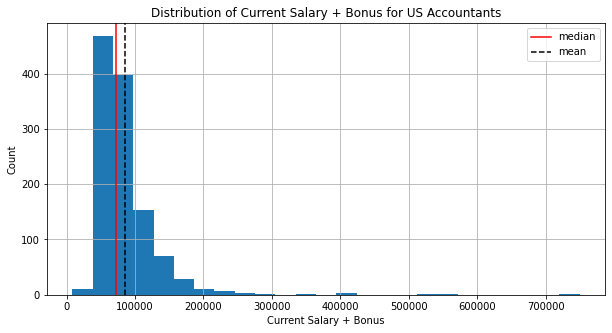

In [20]:
median_salary = us_accounting['Current Salary + Bonus'].median()
mean_salary = us_accounting['Current Salary + Bonus'].mean()
print('Median Salary for US Accountants: ', median_salary)
print('Mean Salary for US Accountants: ', round(mean_salary, 2))
plt.figure(figsize=(10,5))
us_accounting['Current Salary + Bonus'].hist(bins=25)
plt.axvline(median_salary, color='r', label='median')
plt.axvline(mean_salary, color='black', linestyle='--', label='mean')
plt.xlabel('Current Salary + Bonus')
plt.ylabel('Count')
plt.title('Distribution of Current Salary + Bonus for US Accountants')
plt.legend();

In [21]:
us_salary_median = us_accounting['Current Salary + Bonus'].median()
us_accounting['Current Salary + Bonus'].fillna(us_salary_median, inplace=True)

#### `'Current Salary + Bonus'` column cleared!

### Cleaning `'Line of Service'` column

There are a way too many unique values (93) to be useful right now, many values are duplicate entries and we can distill this list down to a few major categories.

In [22]:
print('Number of unique Lines of Service: ', len(us_accounting['Line of Service'].unique()))
print()
print(us_accounting['Line of Service'].unique())

Number of unique Lines of Service:  93

[nan 'Tax' 'Audit' 'Process Automation (Python)'
 'Advisory - Risk/IT Advisory'
 'Intern at big 4. salary is offer upon graduation. ' 'Consulting'
 'Internal Audit' 'HOA MGMT' 'Audit, tax, advisory' 'FLDP'
 'Risk Assurance (Maps to Audit at my B4)'
 'Advisory - Transaction Services/Financial Due Diligence/Corporate Finance/Restructuring'
 'Government' '-Advisory - Deal Advisory' 'Financial Analyst'
 'Audit focus with some tax work' 'Payroll' 'Industry' 'Audit & tax'
 'Assurance - Investment Performance' 'Transfer Pricing'
 'Advisory - Other' 'Examinations and some Audit' 'Tax/GL accounting'
 'Controller' 'Staff' 'Staff accountant' 'Audit & Tax'
 'Financial Institution Examiner'
 '3rd Party Admin, oursourced accounting services'
 'Outsourced accounting & tax' 'Tax and audit'
 'Internal Audit (not outsourced/external - the Firm is my client)'
 'State and Local Tax' 'Tax and Audit' 'AP/AR' 'Financial Reporting'
 'Revenue ' 'Tax Jan-April, Audit July

To take care of this problem, I'll create a dictionary that maps similar lines of service to the same category

In [25]:
Los_dict = {
    'Internal Audit': 'Audit',
    'IT Audit': 'Audit',
    'Risk Assurance (Maps to Audit at my B4)': 'Audit',
    'Audit, tax, advisory': 'Tax and Audit',
    'Audit focus with some tax work': 'Tax and Audit',
    'Audit & tax': 'Tax and Audit',
    'Audit & Tax': 'Tax and Audit',
    'Tax Jan-April, Audit July-Dec': 'Tax and Audit',
    'audit and tax': 'Tax and Audit',
    'Audit/Tax': 'Tax and Audit',
    'Audit AND Tax': 'Tax and Audit',
    'Both audit and tax': 'Tax and Audit',
    'Audit & Tax ': 'Tax and Audit',
    'Audit and Tax': 'Tax and Audit',
    'Tax and audit': 'Tax and Audit',
    'Advisory - Risk/IT Advisory': 'Advisory',
    'Advisory - Transaction Services/Financial Due Diligence/Corporate Finance/Restructuring': 'Advisory',
    'Advisory - Other': 'Advisory',
    '-Advisory - Deal Advisory': 'Advisory',
    'Advisory - Valuations': 'Advisory',
    'Intern at big 4. salary is offer upon graduation. ': 'Intern',
    'Financial Accounting Advisory': 'Advisory',
    'Tax/Advisory ': 'Advisory',
    'AP/AR': 'Corporate', #AR/AP doesn't occur at public firms, only corporate ones
    'Accounts Payable': 'Corporate', #Accounts Payable only occurs at corporate firms
    'Internal Audit (not outsourced/external - the Firm is my client)': 'Audit',
    'Audit and FDD': 'Audit',
    'Corp': 'Corporate',
    'Corporate Accounting and Finance': 'Corporate',
    'Corporate accounting': 'Corporate',
    'Financial Analyst': 'Finance',
    'Financial Institution Examiner': 'Finance',
    'Financial Reporting': 'Finance',
    'Forensics ': 'Forensic',
    'FP&A': 'Finance',
    'Industry': 'Corporate' #Industrial accounting is the same as Corporate accounting
}

Afterwards, all remaining entries in Line of Service occur with very low frequencies and I will map these remaining values into the `"Other"` category

In [26]:
## Use Index to map the uncommon Lines of Service (10th most common and below)
infrequent_los = list(us_accounting['Line of Service'].value_counts()[10:].index) 

Last, I'll define a function that we can apply to the `'Line of Service'` column which will distill duplicates into the same category

In [27]:
def los_getter(x, input_dict, los_list):
    if x in input_dict:
        return input_dict[x]
    elif x in los_list:
        return 'Other'
    else:
        return x
    
us_accounting['Line of Service'] = us_accounting['Line of Service'].apply(los_getter, args=(Los_dict, infrequent_los))
us_accounting['Line of Service'].sort_values().unique()

array(['Advisory', 'Audit', 'Corporate', 'Finance', 'Forensic', 'Intern',
       'Other', 'Tax', 'Tax and Audit', nan], dtype=object)

Now we need to deal with the NaN values

In [28]:
us_accounting['Line of Service'].isnull().value_counts()

False    1076
True      123
Name: Line of Service, dtype: int64

Since we have no information to help impute values for `Line of Service`, we'll fill NaN values with `'Other'`

In [29]:
us_accounting['Line of Service'].fillna('Other', inplace=True)
us_accounting['Line of Service'].isnull().value_counts()

False    1199
Name: Line of Service, dtype: int64

#### `'Line of Service column cleaned'`!

### Cleaning `'Gender'` column

We have 7 NaN values to deal with and two categories, `'Prefer not to say'` and `'Other'`, that we can distill down.

In [30]:
us_accounting['Gender'].isnull().value_counts()

False    1192
True        7
Name: Gender, dtype: int64

In [31]:
us_accounting['Gender'].value_counts()

Male                 898
Female               263
Prefer not to say     26
Other                  5
Name: Gender, dtype: int64

I plan to combine the `'Prefer not to say'` and `'Other'` categories, along with NaN entries into a new category `'Undislosed'`

In [32]:
us_accounting.loc[us_accounting['Gender']=='Prefer not to say', 'Gender'] = 'Undisclosed'
us_accounting.loc[us_accounting['Gender']=='Other', 'Gender'] = 'Undisclosed'

In [33]:
us_accounting['Gender'].fillna(value='Undisclosed', inplace=True)
us_accounting['Gender'].isnull().value_counts()

False    1199
Name: Gender, dtype: int64

In [34]:
us_accounting['Gender'].value_counts()

Male           898
Female         263
Undisclosed     38
Name: Gender, dtype: int64

#### `'Gender'` column cleaned!

### Cleaning `'Has CPA'` column

In [35]:
us_accounting['Has CPA'].unique()

array(['No',
       "I've passed all my CPA exams but I'm still completing the experience requirement",
       'Yes', nan], dtype=object)

Let's rename one of the categories to something more manageable

In [36]:
us_accounting.loc[us_accounting['Has CPA']=="I've passed all my CPA exams but I'm still completing the experience requirement", 'Has CPA'] = 'Finishing Exp Req'
us_accounting['Has CPA'].unique()

array(['No', 'Finishing Exp Req', 'Yes', nan], dtype=object)

Now we only have to deal with 2 Nan values.

In [37]:
us_accounting['Has CPA'].isnull().value_counts()

False    1197
True        2
Name: Has CPA, dtype: int64

In [38]:
us_accounting[us_accounting['Has CPA'].isnull()]

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week
150,I am currently working at a Big 4 accounting firm,NaN,1.0,65000.0,NaN,Public Accounting,High,Male,Tax,50.0
933,NaN,NaN,NaN,72000.0,NaN,NaN,Medium,Male,Other,NaN


Because one of the rows is missing most of it's values, I will drop it.
For the other row, I will impute 'Has CPA' using the mode.  

Note, it might be better to drop both rows though as it's only two entries with fairly typical entries in the other columns that shouldn't affect the rest of our analysis that much.

In [39]:
us_accounting.drop(index=933, inplace=True)

In [40]:
us_accounting['Has CPA'].value_counts()

No                   566
Yes                  537
Finishing Exp Req     94
Name: Has CPA, dtype: int64

In [41]:
cpa_mode = us_accounting['Has CPA'].mode()[0]
print('Has CPA mode: ', cpa_mode)
us_accounting['Has CPA'].fillna(cpa_mode, inplace=True)

# # If we wanted to drop the row, we could do this instea
# us_accounting.drop(index=us_accounting[us_accounting['Has CPA'].isnull()].index, inplace=True)

Has CPA mode:  No


In [43]:
us_accounting['Has CPA'].isnull().value_counts()

False    1198
Name: Has CPA, dtype: int64

`'Has CPA'` column cleaned!

## Cleaning `'Years Experience'` column

We're missing 110 values in the 'Years Experience' column.  Since the distribution is right skewed, I will choose to impute the median for these values

In [44]:
us_accounting['Years Experience'].isnull().value_counts()

False    1089
True      109
Name: Years Experience, dtype: int64

US accountants median years experience:  3.0
US accountants mean years experience:  4.2


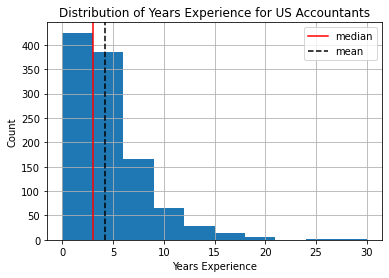

In [45]:
median_yrs_exp = us_accounting['Years Experience'].median()
mean_yrs_exp = us_accounting['Years Experience'].mean()
print('US accountants median years experience: ', median_yrs_exp)
print('US accountants mean years experience: ', round(mean_yrs_exp, 1))
us_accounting['Years Experience'].hist()
plt.axvline(median_yrs_exp, label='median', color='red')
plt.axvline(mean_yrs_exp, label='mean', color='black', linestyle='--')
plt.xlabel('Years Experience')
plt.ylabel('Count')
plt.title('Distribution of Years Experience for US Accountants')
plt.legend();

In [46]:
us_accounting['Years Experience'].fillna(us_accounting['Years Experience'].median(), inplace=True)
us_accounting['Years Experience'].isnull().value_counts()

False    1198
Name: Years Experience, dtype: int64

### Cleaning entries that don't make sense

`Years Experience` 0 must be a typo of sorts, especially for the people that list themselves as working 40+ hours a week. 

I will handle these entries in multiple sections.  

#### Targeting those who have an exit status indicating they are still working for a public firm.

In [47]:
us_accounting[us_accounting['Years Experience'] == 0]

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week
0,I am still in school,No,0.0,72000.0,NaN,NaN,High,Male,Other,NaN
1,I am currently working at a Big 4 accounting firm,No,0.0,100000.0,NaN,Public Accounting,Medium,Female,Tax,NaN
2,I am currently working at a Big 4 accounting firm,No,0.0,63000.0,NaN,Public Accounting,High,Male,Audit,50.0
3,I am currently working at a mid-tier or local ...,No,0.0,61000.0,NaN,Public Accounting,High,Male,Tax,50.0
4,I am currently working at a mid-tier or local ...,No,0.0,67000.0,NaN,Public Accounting,High,Male,Other,40.0
5,I have never worked at a public accounting firm,No,0.0,72000.0,NaN,Construction,Medium,Male,Other,40.0
6,I am still in school,No,0.0,62000.0,NaN,Finance,Medium,Female,Audit,40.0
1173,I am currently working at a Big 4 accounting firm,No,0.0,66000.0,NaN,Public Accounting,High,Male,Advisory,45.0


Because `Years Experience` is right skewed for accountants who are currently working for a public firm, I will find the median years experience for this group of accountants and impute that value for those who have 0 years experience listed.

Median Years Experience for Public Accountants who have > 0 years experience:  3.0


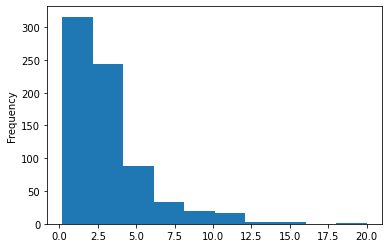

In [48]:
public_accountants_with_exp = us_accounting[
    (us_accounting['Years Experience'] != 0) & 
    (
        (us_accounting['Exit Status'] == 'I am currently working at a Big 4 accounting firm') | 
        (us_accounting['Exit Status'] == 'I am currently working at a mid-tier or local accounting firm')
    )
]
public_accountants_with_exp['Years Experience'].plot.hist()
public_accountants_median_exp = public_accountants_with_exp['Years Experience'].median()
print('Median Years Experience for Public Accountants who have > 0 years experience: ', public_accountants_median_exp)

In [49]:
us_accounting.loc[
    (us_accounting['Years Experience'] == 0) & 
    (
        (us_accounting['Exit Status'] == 'I am currently working at a Big 4 accounting firm') | 
        (us_accounting['Exit Status'] == 'I am currently working at a mid-tier or local accounting firm')
    ), 
    'Years Experience'
] = public_accountants_median_exp

#### Targeting the accountant who has never worked in a public accounting firm


In [50]:
us_accounting[us_accounting['Years Experience'] == 0]

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week
0,I am still in school,No,0.0,72000.0,NaN,NaN,High,Male,Other,NaN
5,I have never worked at a public accounting firm,No,0.0,72000.0,NaN,Construction,Medium,Male,Other,40.0
6,I am still in school,No,0.0,62000.0,NaN,Finance,Medium,Female,Audit,40.0


Because `Years Experience` is right skewed for accountants who have never worked for a public firm, I will find the median years experience for this group of accountants and impute that value for those who have 0 years experience listed.

Median Years Experience for Private Accountants who have > 0 years experience:  4.5


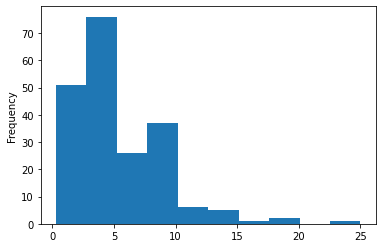

In [51]:
private_accountants_with_exp = us_accounting[(us_accounting['Exit Status'] == 'I have never worked at a public accounting firm') & (us_accounting['Years Experience'] != 0)]
private_accountants_with_exp['Years Experience'].plot.hist()
private_accountants_median_exp = private_accountants_with_exp['Years Experience'].median()
print('Median Years Experience for Private Accountants who have > 0 years experience: ', private_accountants_median_exp)

In [52]:
us_accounting.loc[
    (us_accounting['Exit Status'] == 'I have never worked at a public accounting firm') & 
    (us_accounting['Years Experience'] == 0), 
    'Years Experience']  = private_accountants_median_exp

#### Targeting accountants listed as being in school
All that's left is to deal with these two entries.  These are the trickiest because their `Exit Status` is listed as being still in school and it makes it more likely that they have 0 years of experience.  I will drop these values as they comprise an extremely low percentage of the overall sample and contain a few NaN values anyways.

In [53]:
us_accounting[us_accounting['Years Experience'] == 0]

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week
0,I am still in school,No,0.0,72000.0,NaN,NaN,High,Male,Other,NaN
6,I am still in school,No,0.0,62000.0,NaN,Finance,Medium,Female,Audit,40.0


In [54]:
drop_ind = us_accounting[us_accounting['Years Experience'] == 0].index
us_accounting.drop(drop_ind, inplace=True)

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week


`'Years Experience'` column cleaned!

## Cleaning `'Exit Status'` column

We have a duplicate value at "I am currently working at a Big 4 accounting firm" and "I am currently workting at a Big 4 Accounting Firm"

In [55]:
us_accounting['Exit Status'].unique()

array(['I am currently working at a Big 4 accounting firm',
       'I am currently working at a mid-tier or local accounting firm',
       'I have never worked at a public accounting firm',
       'I am still in school',
       'I have already exited from a Big 4 Accounting firm',
       'I am currently working at a Big 4 Accounting firm',
       'I have already exited from a mid-tier or local accounting firm',
       nan], dtype=object)

In [56]:
us_accounting.loc[us_accounting['Exit Status'] == 'I am currently working at a Big 4 Accounting firm', 'Exit Status'] = 'I am currently working at a Big 4 accounting firm'
us_accounting['Exit Status'].value_counts()

I am currently working at a mid-tier or local accounting firm     402
I am currently working at a Big 4 accounting firm                 329
I have never worked at a public accounting firm                   206
I have already exited from a Big 4 Accounting firm                111
I have already exited from a mid-tier or local accounting firm    104
I am still in school                                               43
Name: Exit Status, dtype: int64

For the null values, I will impute the mode

In [57]:
us_accounting['Exit Status'].isnull().value_counts()

False    1195
True        1
Name: Exit Status, dtype: int64

In [58]:
us_accounting[us_accounting['Exit Status'].isnull()]

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week
1166,NaN,No,4.0,74250.0,NaN,Public Accounting,Medium,Male,Audit,45.0


Because this person indicates they are in Public Accounting, it is reasonable to assume that their exit status is NaN because they have yet to exit the public firm they work at.  Therefore, it is likely we can impute `'I am currently working at a mid-tier or local accounting firm'` or `'I am currently working at a Big 4 accounting firm'`.  Because one of those options is the mode, I will impute that value.

In [59]:
print(us_accounting['Exit Status'].value_counts().to_string())
mode_exit_status = us_accounting['Exit Status'].mode()[0]
print()
print('US accounting mode for exit status from public accounting: ', mode_exit_status)

I am currently working at a mid-tier or local accounting firm     402
I am currently working at a Big 4 accounting firm                 329
I have never worked at a public accounting firm                   206
I have already exited from a Big 4 Accounting firm                111
I have already exited from a mid-tier or local accounting firm    104
I am still in school                                               43

US accounting mode for exit status from public accounting:  I am currently working at a mid-tier or local accounting firm


In [60]:
us_accounting['Exit Status'].fillna(mode_exit_status, inplace=True)

In [61]:
us_accounting['Exit Status'].isnull().value_counts()

False    1196
Name: Exit Status, dtype: int64

`'Exit Status'` column cleaned!

## Cleaning `'Years Public Before Exit'` column

## Null Values

In [62]:
us_accounting['Years Public Before Exit'].isnull().value_counts()

True     968
False    228
Name: Years Public Before Exit, dtype: int64

This column is tied to the `'Exit Status'` column as you will only have `'Years Public Before Exit'` filled in for certain exit statuses, namely 'I have never worked at a public accounting firm', 'I am currently working at a mid-tier or local accounting firm', 'I am currently working at a Big 4 accounting firm', and 'I am still in school.  These are the groups that haven't exited public accounting, or were never in it, so it makes sense for their `'Years Public Before Exit'` values to be NaN.  We can see we have NaN values in other categories though, so let's deal with those first.

#### null values that don't make sense - 'I have already exited from a Big 4 Accounting firm' or 'I have already exited from a mid-tier of local accounting firm'

In [63]:
us_accounting[(us_accounting['Years Public Before Exit'].isnull()==True)]['Exit Status'].value_counts()

I am currently working at a mid-tier or local accounting firm     397
I am currently working at a Big 4 accounting firm                 325
I have never worked at a public accounting firm                   199
I am still in school                                               43
I have already exited from a Big 4 Accounting firm                  3
I have already exited from a mid-tier or local accounting firm      1
Name: Exit Status, dtype: int64

In [64]:
us_accounting[
    (us_accounting['Years Public Before Exit'].isnull()==True) & 
    (
        (us_accounting['Exit Status'] == 'I have already exited from a Big 4 Accounting firm') | 
        (us_accounting['Exit Status'] == 'I have already exited from a mid-tier or local accounting firm')
    )
]

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week
165,I have already exited from a mid-tier or local...,No,1.0,55000.0,NaN,Public Accounting,Low,Male,Tax,45.0
749,I have already exited from a Big 4 Accounting ...,No,6.0,108000.0,NaN,Public Accounting,High,Female,Advisory,35.0
786,I have already exited from a Big 4 Accounting ...,Yes,6.5,93000.0,NaN,Public Accounting,High,Female,Tax and Audit,NaN
1073,I have already exited from a Big 4 Accounting ...,Yes,12.0,127600.0,NaN,Other,Medium,Male,Audit,45.0


We could consider imputing the mean or the median for these NaN values in `'Years Public Before Exit'`

Median Years in Public Accounting before exiting:  3.0
Mean Years in Public Accounting before exiting:  3.4611096491228066


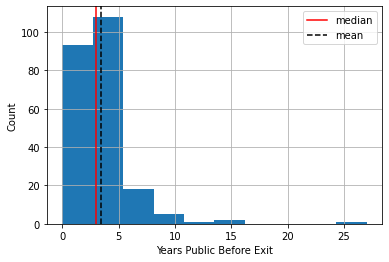

In [65]:
yrs_public_median = us_accounting['Years Public Before Exit'].median()
yrs_public_mean = us_accounting['Years Public Before Exit'].mean()
print('Median Years in Public Accounting before exiting: ', yrs_public_median)
print('Mean Years in Public Accounting before exiting: ', yrs_public_mean)
us_accounting['Years Public Before Exit'].hist()
plt.axvline(yrs_public_median, color='r', label = 'median')
plt.axvline(yrs_public_mean, color= 'black', linestyle='--', label='mean')
plt.legend()
plt.xlabel('Years Public Before Exit')
plt.ylabel('Count');

The distribution looks right-skewed, so the median will be a better choice to impute.  This makes sense for all the values, except for the one below.  It's reasonable to assume that if one has exited from public accounting, their `'Years Experience'` would be higher than their `'Years Public Before Exit'`.  If we impute the Median Years Before Exit of 3, this will be greater than their `'Years Experience`' of 1.  I'm unsure of how to handle this, but I my plan is to make their `'Years Public Before Exit'` equal the '`Years Experience'` value.  Since it's only one data value and the sample size is large, it shouldn't affect the overall sample too much.

In [66]:
us_accounting.iloc[164, 4] = 1
us_accounting.iloc[164,:]

Exit Status                 I am currently working at a mid-tier or local ...
Has CPA                                                                    No
Years Experience                                                          1.0
Current Salary + Bonus                                                62500.0
Years Public Before Exit                                                  1.0
Current Industry                                            Public Accounting
What COL is your region?                                               Medium
Gender                                                                   Male
Line of Service                                                         Audit
Average Hours Per Week                                                   43.0
Name: 167, dtype: object

Now let's fill the remaining NaN values with the median , for the people who state they've exited public accounting

In [67]:
already_exited = us_accounting[
    (us_accounting['Years Public Before Exit'].isnull()==True) & 
    (
        (us_accounting['Exit Status'] == 'I have already exited from a Big 4 Accounting firm') | 
        (us_accounting['Exit Status'] == 'I have already exited from a mid-tier or local accounting firm')
    )
]
already_exited

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week
165,I have already exited from a mid-tier or local...,No,1.0,55000.0,NaN,Public Accounting,Low,Male,Tax,45.0
749,I have already exited from a Big 4 Accounting ...,No,6.0,108000.0,NaN,Public Accounting,High,Female,Advisory,35.0
786,I have already exited from a Big 4 Accounting ...,Yes,6.5,93000.0,NaN,Public Accounting,High,Female,Tax and Audit,NaN
1073,I have already exited from a Big 4 Accounting ...,Yes,12.0,127600.0,NaN,Other,Medium,Male,Audit,45.0


In [68]:
us_accounting.loc[
    (us_accounting['Years Public Before Exit'].isnull()==True) & 
    (
        (us_accounting['Exit Status'] == 'I have already exited from a Big 4 Accounting firm') | 
        (us_accounting['Exit Status'] == 'I have already exited from a mid-tier or local accounting firm')
    ),
    'Years Public Before Exit'
] = yrs_public_median

In [69]:
us_accounting[
    (us_accounting['Years Public Before Exit'].isnull()==True) & 
    (
        (us_accounting['Exit Status'] == 'I have already exited from a Big 4 Accounting firm') | 
        (us_accounting['Exit Status'] == 'I have already exited from a mid-tier or local accounting firm')
    )
]

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week


In [70]:
us_accounting[(us_accounting['Years Public Before Exit'].isnull()==True)]['Exit Status'].value_counts()

I am currently working at a mid-tier or local accounting firm    396
I am currently working at a Big 4 accounting firm                325
I have never worked at a public accounting firm                  199
I am still in school                                              43
Name: Exit Status, dtype: int64

Now the only NaN entries are ones that make sense given someone's `'Exit Status'`'

## Non-Null Values

We run into a similar problem with some of the non-null values in `'Exit Status'`.  The only people who should have non-null values here are the people who have already exited from a public accounting firm, however there are people who are saying they are still working in public accounting, or who have never worked in it, who responded to this field of the survey

#### non-null values - 'I have never worked at a public accounting firm'

In [71]:
us_accounting[(us_accounting['Years Public Before Exit'].isnull()==False)]['Exit Status'].value_counts()

I have already exited from a Big 4 Accounting firm                111
I have already exited from a mid-tier or local accounting firm    104
I am currently working at a mid-tier or local accounting firm       7
I have never worked at a public accounting firm                     7
I am currently working at a Big 4 accounting firm                   4
Name: Exit Status, dtype: int64

When one has never worked at a public accounting firm, it makes more sense to have a NaN value than a 0 value for `'Years Before Public Exit'`.

In [72]:
us_accounting[(us_accounting['Years Public Before Exit'].isnull()==False) & (us_accounting['Exit Status'] == 'I have never worked at a public accounting firm')]

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week
29,I have never worked at a public accounting firm,No,1.0,44000.0,0.0,Government,Low,Male,Audit,NaN
578,I have never worked at a public accounting firm,No,5.0,150000.0,0.0,Energy,Medium,Undisclosed,Other,NaN
589,I have never worked at a public accounting firm,No,5.0,60000.0,0.0,Construction,High,Male,Other,NaN
780,I have never worked at a public accounting firm,No,8.0,65000.0,0.0,Manufacturing,Low,Female,Other,45.0
868,I have never worked at a public accounting firm,Yes,13.0,100000.0,0.0,Finance,Medium,Male,Advisory,NaN
987,I have never worked at a public accounting firm,No,4.0,50000.0,1.5,Medical,Medium,Male,Other,45.0
1153,I have never worked at a public accounting firm,No,6.0,132000.0,0.0,Manufacturing,Medium,Female,Other,45.0


In [73]:
us_accounting.loc[(us_accounting['Years Public Before Exit'].isnull()==False) & (us_accounting['Exit Status'] == 'I have never worked at a public accounting firm') & (us_accounting['Years Public Before Exit']==0), 'Years Public Before Exit'] = np.nan

For the remaining entry where `Years Public Before Exit` is 1.5, I'm not sure what to do.  This person either must have entered `Exit Status` or `Years Public Before Exit` incorrectly.  Given how explicit the `Years Public Before Exit` question was on the survey, I suspect they entered `Exit Status` in incorrectly.  I'm going to change their `Exit Status` to the most frequent already exited response.

In [74]:
us_accounting[(us_accounting['Years Public Before Exit'].isnull()==False) & (us_accounting['Exit Status'] == 'I have never worked at a public accounting firm')]

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week
987,I have never worked at a public accounting firm,No,4.0,50000.0,1.5,Medical,Medium,Male,Other,45.0


In [75]:
us_accounting['Exit Status'].value_counts()

I am currently working at a mid-tier or local accounting firm     403
I am currently working at a Big 4 accounting firm                 329
I have never worked at a public accounting firm                   206
I have already exited from a Big 4 Accounting firm                111
I have already exited from a mid-tier or local accounting firm    104
I am still in school                                               43
Name: Exit Status, dtype: int64

In [76]:
us_accounting.loc[(us_accounting['Years Public Before Exit'].isnull()==False) & (us_accounting['Exit Status'] == 'I have never worked at a public accounting firm'), 'Exit Status'] = 'I have already exited from a Big 4 Accounting firm' 

In [77]:
us_accounting[(us_accounting['Years Public Before Exit'].isnull()==False)]['Exit Status'].value_counts()

I have already exited from a Big 4 Accounting firm                112
I have already exited from a mid-tier or local accounting firm    104
I am currently working at a mid-tier or local accounting firm       7
I am currently working at a Big 4 accounting firm                   4
Name: Exit Status, dtype: int64

### non-null values - 'I am currently working at a mid-tier or local accounting firm'

Since all of these people say they're still working at a public firm, it again makes sense to set the `'Years Public Before Exit'` values to NaN

In [78]:
us_accounting[(us_accounting['Years Public Before Exit'].isnull()==False) & (us_accounting['Exit Status'] == 'I am currently working at a mid-tier or local accounting firm')]

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week
76,I am currently working at a mid-tier or local ...,No,1.0,56000.0,1.0,Public Accounting,Medium,Female,Tax,NaN
167,I am currently working at a mid-tier or local ...,No,1.0,62500.0,1.0,Public Accounting,Medium,Male,Audit,43.0
404,I am currently working at a mid-tier or local ...,Yes,3.0,48500.0,3.0,Public Accounting,Medium,Male,Tax,NaN
430,I am currently working at a mid-tier or local ...,No,3.0,60000.0,2.5,Public Accounting,High,Female,Tax,60.0
640,I am currently working at a mid-tier or local ...,Finishing Exp Req,5.0,90000.0,5.0,Public Accounting,High,Male,Audit,45.0
668,I am currently working at a mid-tier or local ...,Yes,6.0,90000.0,4.0,Public Accounting,Medium,Male,Advisory,NaN
679,I am currently working at a mid-tier or local ...,Yes,6.0,93000.0,3.0,Public Accounting,Medium,Male,Advisory,NaN


In [79]:
us_accounting.loc[(us_accounting['Years Public Before Exit'].isnull()==False) & (us_accounting['Exit Status'] == 'I am currently working at a mid-tier or local accounting firm'), 'Years Public Before Exit'] = np.nan

In [80]:
us_accounting[(us_accounting['Years Public Before Exit'].isnull()==False) & (us_accounting['Exit Status'] == 'I am currently working at a mid-tier or local accounting firm')]

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week


In [81]:
us_accounting[(us_accounting['Years Public Before Exit'].isnull()==False)]['Exit Status'].value_counts()

I have already exited from a Big 4 Accounting firm                112
I have already exited from a mid-tier or local accounting firm    104
I am currently working at a Big 4 accounting firm                   4
Name: Exit Status, dtype: int64

### non-null values - 'I am currently working at a Big 4 accounting firm'

One more time, since all of these people say they're still working at a public firm, we'll set their `Years Public Before Exit` to NaN

In [82]:
us_accounting[(us_accounting['Years Public Before Exit'].isnull()==False) & (us_accounting['Exit Status'] == 'I am currently working at a Big 4 accounting firm')]

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week
423,I am currently working at a Big 4 accounting firm,No,3.0,94000.0,3.0,Public Accounting,High,Male,Tax,45.0
657,I am currently working at a Big 4 accounting firm,No,5.0,170000.0,5.0,Public Accounting,Medium,Male,Tax,50.0
776,I am currently working at a Big 4 accounting firm,Yes,8.0,140000.0,3.0,Public Accounting,High,Female,Tax,NaN
916,I am currently working at a Big 4 accounting firm,No,3.0,104000.0,4.5,Public Accounting,High,Male,Tax,NaN


In [83]:
us_accounting.loc[(us_accounting['Years Public Before Exit'].isnull()==False) & (us_accounting['Exit Status'] == 'I am currently working at a Big 4 accounting firm'), 'Years Public Before Exit'] = np.nan

In [84]:
us_accounting[(us_accounting['Years Public Before Exit'].isnull()==False) & (us_accounting['Exit Status'] == 'I am currently working at a Big 4 accounting firm')]

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week


In [85]:
us_accounting[(us_accounting['Years Public Before Exit'].isnull()==False)]['Exit Status'].value_counts()

I have already exited from a Big 4 Accounting firm                112
I have already exited from a mid-tier or local accounting firm    104
Name: Exit Status, dtype: int64

In [86]:
us_accounting['Years Public Before Exit'].isnull().value_counts()

True     980
False    216
Name: Years Public Before Exit, dtype: int64

Lastly, we have a problem with the following two entries.  These accountants have listed they have less years experience than years public before exit.  Since both of these accountants have already exited from a public accounting firm, they should have more years of experience than years working in a public firm.  I will change the years experience values to equal the years public before exit values, but don't have any more information to get any more accurate.

In [87]:
us_accounting[us_accounting['Years Public Before Exit'] > us_accounting['Years Experience']]

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week
165,I have already exited from a mid-tier or local...,No,1.0,55000.0,3.0,Public Accounting,Low,Male,Tax,45.0
347,I have already exited from a mid-tier or local...,No,2.5,100000.0,3.0,Finance,Medium,Male,Audit,40.0
1141,I have already exited from a Big 4 Accounting ...,No,3.0,102000.0,5.0,Technology,Medium,Male,Advisory,50.0


In [88]:
us_accounting.loc[us_accounting['Years Public Before Exit'] > us_accounting['Years Experience'], 'Years Experience'] = us_accounting.loc[us_accounting['Years Public Before Exit'] > us_accounting['Years Experience'], 'Years Public Before Exit']

#### `'Years Public Before Exit'` cleaned!  All null values non-null values make sense

### Cleaning `'Current Industry'` column

There are 23 null values that need to be dealt with.  I will put them in the 'Other' category

In [89]:
us_accounting['Current Industry'].isnull().value_counts()

False    1175
True       21
Name: Current Industry, dtype: int64

In [90]:
us_accounting['Current Industry'].unique()

array(['Public Accounting', 'Construction', 'Technology', nan, 'Finance',
       'Other', 'Energy', 'Government', 'Manufacturing', 'Medical',
       'Agriculture/Food processing', 'Transportation', 'Hospitality',
       'Aerospace'], dtype=object)

In [91]:
us_accounting['Current Industry'].value_counts()

Public Accounting              701
Other                          100
Finance                         91
Technology                      84
Manufacturing                   51
Government                      44
Medical                         42
Construction                    20
Energy                          17
Hospitality                     13
Agriculture/Food processing      5
Transportation                   5
Aerospace                        2
Name: Current Industry, dtype: int64

In [92]:
us_accounting['Current Industry'].fillna('Other', inplace=True)
us_accounting['Current Industry'].isnull().value_counts()

False    1196
Name: Current Industry, dtype: int64

### Handling some entries that don't make sense

We have accountants that say they are currently working at a Big 4 accounting firm, yet they list their `Current Industry` as something other than Public Accounting.  It's likely that these people specialize in a certain industry, for instance a public accounting firm that has a team/department which solely audits private medical firms.  These people work for the Public Accounting industry and should be categorized as such, the private industry firms are just their clients.

In [93]:
big4_df = us_accounting[us_accounting['Exit Status'] == 'I am currently working at a Big 4 accounting firm']
big4_df['Current Industry'].value_counts()

Public Accounting    289
Finance               11
Technology            11
Other                  8
Energy                 4
Government             3
Medical                2
Manufacturing          1
Name: Current Industry, dtype: int64

Because these accountants also have NaN for `Years Public Before Exit`, it makes sense for them to still be at a public accounting firm, so I think it's less likely that some kind of input error occurred when the accountant was filling out the survey, which could explain the discrepancy above.  For these reasons, I plan to take all of these accountants and set their `Current Industry` to Public Accounting

In [94]:
big4_df_num_accountants = len(big4_df['Current Industry'])
big4_df_num_accountants_null_yrs_exit = sum(big4_df['Years Public Before Exit'].isnull().value_counts())

print('The number of accountants who say they are currently working at a Big 4 accounting firm: {}'.format(big4_df_num_accountants))
print('Of those {} accountants, the number who have Years Public Before Exit listed as NaN: {}'.format(big4_df_num_accountants, big4_df_num_accountants_null_yrs_exit))

us_accounting.loc[us_accounting['Exit Status'] == 'I am currently working at a Big 4 accounting firm', 'Current Industry'] = 'Public Accounting'

The number of accountants who say they are currently working at a Big 4 accounting firm: 329
Of those 329 accountants, the number who have Years Public Before Exit listed as NaN: 329


Same situation as earlier, these accountants indicate they are still working at a mid-tier or local public accounting firm, but list their current industry as otherwise, and list their `Years Public Before Exit` as NaN.  I will also set the `Current Industry` for accountants to Public Accounting.

In [95]:
mid_local_df= us_accounting[us_accounting['Exit Status'] == 'I am currently working at a mid-tier or local accounting firm']
mid_local_num_accountants = sum(mid_local_df['Current Industry'].value_counts())
mid_local_num_accountants_null_yrs_exit = sum(mid_local_df['Years Public Before Exit'].isnull().value_counts())

print('The number of accountants who say they are currently working at a Mid-tier or Local Accounting firm: {}'.format(mid_local_num_accountants))
print('Of those {} accountants, the number of accountants who have Years Public Before Exit listed as NaN: {}'.format(mid_local_num_accountants, mid_local_num_accountants_null_yrs_exit))

us_accounting.loc[us_accounting['Exit Status'] == 'I am currently working at a mid-tier or local accounting firm', 'Current Industry'] = 'Public Accounting'

The number of accountants who say they are currently working at a Mid-tier or Local Accounting firm: 403
Of those 403 accountants, the number of accountants who have Years Public Before Exit listed as NaN: 403


In [96]:
us_accounting[(us_accounting['Exit Status'] == 'I am currently working at a Big 4 accounting firm') | (us_accounting['Exit Status'] == 'I am currently working at a mid-tier or local accounting firm')]['Current Industry'].value_counts()

Public Accounting    732
Name: Current Industry, dtype: int64

These entries also don't make sense.  If Years Public Before exit >= 0, it implies you've exited from public accounting, yet Public Accounting is listed as the current industry...I am going to change their current industry to Other

In [97]:
weird_entries_mask = (us_accounting['Years Public Before Exit']>=0) & (us_accounting['Current Industry'] == 'Public Accounting')
us_accounting[weird_entries_mask]

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week
165,I have already exited from a mid-tier or local...,No,3.0,55000.0,3.0,Public Accounting,Low,Male,Tax,45.0
301,I have already exited from a Big 4 Accounting ...,Yes,2.0,93000.0,2.0,Public Accounting,Medium,Male,Audit,NaN
516,I have already exited from a Big 4 Accounting ...,Yes,3.0,90000.0,1.5,Public Accounting,Medium,Female,Audit,45.0
524,I have already exited from a Big 4 Accounting ...,Yes,4.0,110000.0,2.0,Public Accounting,High,Male,Advisory,NaN
631,I have already exited from a Big 4 Accounting ...,No,4.0,95000.0,3.0,Public Accounting,Medium,Female,Advisory,50.0
749,I have already exited from a Big 4 Accounting ...,No,6.0,108000.0,3.0,Public Accounting,High,Female,Advisory,35.0
786,I have already exited from a Big 4 Accounting ...,Yes,6.5,93000.0,3.0,Public Accounting,High,Female,Tax and Audit,NaN
844,I have already exited from a Big 4 Accounting ...,Yes,7.0,115000.0,5.0,Public Accounting,High,Male,Advisory,40.0
1032,I have already exited from a mid-tier or local...,Yes,3.0,72000.0,3.0,Public Accounting,Low,Male,Advisory,45.0
1115,I have already exited from a mid-tier or local...,Yes,11.0,196000.0,8.0,Public Accounting,Medium,Male,Tax,35.0


In [98]:
us_accounting.loc[weird_entries_mask, 'Current Industry'] = 'Other'
us_accounting[weird_entries_mask]

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week
165,I have already exited from a mid-tier or local...,No,3.0,55000.0,3.0,Other,Low,Male,Tax,45.0
301,I have already exited from a Big 4 Accounting ...,Yes,2.0,93000.0,2.0,Other,Medium,Male,Audit,NaN
516,I have already exited from a Big 4 Accounting ...,Yes,3.0,90000.0,1.5,Other,Medium,Female,Audit,45.0
524,I have already exited from a Big 4 Accounting ...,Yes,4.0,110000.0,2.0,Other,High,Male,Advisory,NaN
631,I have already exited from a Big 4 Accounting ...,No,4.0,95000.0,3.0,Other,Medium,Female,Advisory,50.0
749,I have already exited from a Big 4 Accounting ...,No,6.0,108000.0,3.0,Other,High,Female,Advisory,35.0
786,I have already exited from a Big 4 Accounting ...,Yes,6.5,93000.0,3.0,Other,High,Female,Tax and Audit,NaN
844,I have already exited from a Big 4 Accounting ...,Yes,7.0,115000.0,5.0,Other,High,Male,Advisory,40.0
1032,I have already exited from a mid-tier or local...,Yes,3.0,72000.0,3.0,Other,Low,Male,Advisory,45.0
1115,I have already exited from a mid-tier or local...,Yes,11.0,196000.0,8.0,Other,Medium,Male,Tax,35.0


Everything looks good now!

#### `'Current Industry'` column cleaned!

### Cleaning `'What COL is your region?'` column

In [99]:
us_COL = us_accounting['What COL is your region?']
us_COL.isnull().value_counts()

False    1158
True       38
Name: What COL is your region?, dtype: int64

In [100]:
us_COL.value_counts()

Medium    494
High      490
Low       174
Name: What COL is your region?, dtype: int64

Because Medium and High COL occur with near identical frequency, it's reasonable to impute either here for any NaN values, but I will go with the one that has the highest frequency anyways.

In [101]:
mode_COL = us_COL.mode()[0]
us_accounting['What COL is your region?'].fillna(mode_COL, inplace=True)

In [102]:
us_accounting['What COL is your region?'].isnull().value_counts()

False    1196
Name: What COL is your region?, dtype: int64

#### `'What COL is your region?'` column cleaned!

## Cleaning `'Average Hours Per Week'` column

Again there are a lot of missing values in this column, not sure how to handle this, mean and median are close.  Because this is a distribution of sample averages, I may be able to use normality to fill in missing values somehow, or perhaps use regression to impute here the values instead?

In [103]:
us_accounting['Average Hours Per Week'].isnull().value_counts()

False    648
True     548
Name: Average Hours Per Week, dtype: int64

In [104]:
avg_hours_per_week = us_accounting['Average Hours Per Week']
avg_hours_per_week.median(), avg_hours_per_week.mean()

(45.0, 45.314043209876544)

Median US Accountant Average Hours Per Week:  45.0
Mean US Accountant Average Hours Per week:  45.314043209876544


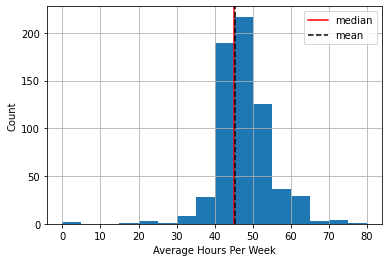

In [105]:
avg_hours_per_week = us_accounting['Average Hours Per Week']
median_avg_hours_per_week = avg_hours_per_week.median()
mean_avg_hours_per_week = avg_hours_per_week.mean()
print('Median US Accountant Average Hours Per Week: ', median_avg_hours_per_week)
print('Mean US Accountant Average Hours Per week: ', mean_avg_hours_per_week)
avg_hours_per_week.hist(bins = np.arange(0, 81, 5))
plt.axvline(median_avg_hours_per_week, label='median', color='red')
plt.axvline(mean_avg_hours_per_week, label='mean', color='black', linestyle='--')
plt.xlabel('Average Hours Per Week')
plt.ylabel('Count')
plt.legend();

Working an average of 0 hours per week on average must be a typo of sorts.  Since the distribution is roughly symmetric I will impute the mean for these values

In [106]:
us_accounting[us_accounting['Average Hours Per Week'] < 10]

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week
960,I am still in school,No,3.0,72000.0,NaN,Other,Medium,Male,Other,0.0
1098,I am still in school,No,1.0,72000.0,NaN,Public Accounting,Medium,Male,Tax,0.0


In [107]:
us_accounting.loc[us_accounting['Average Hours Per Week'] < 10, 'Average Hours Per Week'] = mean_avg_hours_per_week
us_accounting[us_accounting['Average Hours Per Week'] < 10]

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week


#### `Average Hours Per Week` column cleaned!

## Encoding Categorical variables

In [108]:
us_dummies = pd.get_dummies(us_accounting, columns=['Exit Status', 'Has CPA', 'Current Industry', 'What COL is your region?', 'Gender', 'Line of Service'])
us_dummies.head()

,Years Experience,Current Salary + Bonus,Years Public Before Exit,Average Hours Per Week,Exit Status_I am currently working at a Big 4 accounting firm,Exit Status_I am currently working at a mid-tier or local accounting firm,Exit Status_I am still in school,Exit Status_I have already exited from a Big 4 Accounting firm,Exit Status_I have already exited from a mid-tier or local accounting firm,Exit Status_I have never worked at a public accounting firm,...,Gender_Undisclosed,Line of Service_Advisory,Line of Service_Audit,Line of Service_Corporate,Line of Service_Finance,Line of Service_Forensic,Line of Service_Intern,Line of Service_Other,Line of Service_Tax,Line of Service_Tax and Audit
1,3.0,100000.0,NaN,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3.0,63000.0,NaN,50.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3.0,61000.0,NaN,50.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3.0,67000.0,NaN,40.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,4.5,72000.0,NaN,40.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# Finished!  Exporting the cleaned us_accounting results to CSV for analysis

In [109]:
us_accounting.to_csv('./us_accounting_clean.csv', index=False)
us_dummies.to_csv('./us_dummies_clean.csv')

## Rows that still needs cleaning

Years Public Before exit should be > 0 here if the person is indicating they have already exited from a Big 4 Accounting firm, yet it isn't.  We could impute a value, but the mean and median are both over 3, so they don't make sense to impute when the person only has 2.5 years experience.  I'm unsure how to proceed, but the best case may be to drop this entry.

In [110]:
us_accounting[us_accounting['Years Public Before Exit']==0]

,Exit Status,Has CPA,Years Experience,Current Salary + Bonus,Years Public Before Exit,Current Industry,What COL is your region?,Gender,Line of Service,Average Hours Per Week
416,I have already exited from a Big 4 Accounting ...,No,2.5,110000.0,0.0,Technology,High,Male,Audit,40.0
